<h1>Q2</h1>

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

<h3>part a</h3>

(-0.5, 1289.5, 814.5, -0.5)

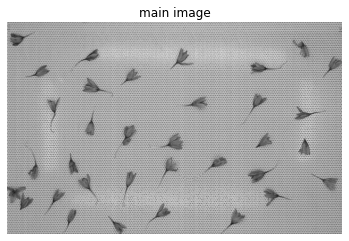

In [2]:
image = cv2.imread(r'images/saffrun.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

(-0.5, 1289.5, 814.5, -0.5)

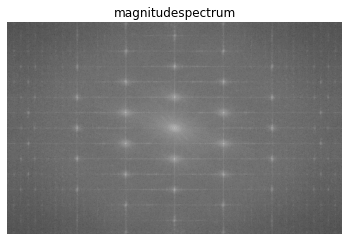

In [3]:
# Apply 2D Fourier transform to the image
f=np.fft.fft2(image)

#shift the zero-frequency component to the center of the spectrum
fshift=np.fft.fftshift(f)
#calculate the magnitude spectrum of the image
magnitudespectrum=20*np.log(np.abs(fshift))

plt.imshow(magnitudespectrum,cmap='gray')
plt.title("magnitudespectrum")
plt.axis("off")


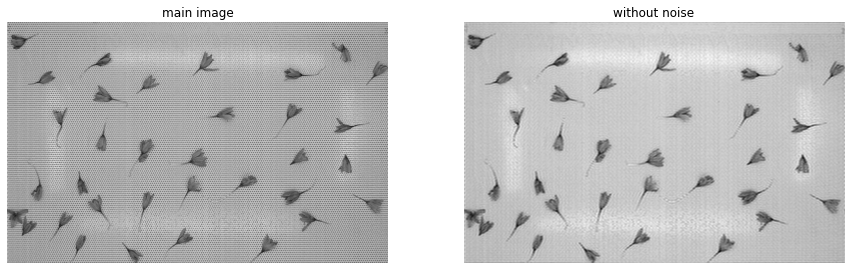

In [4]:
# Extract image dimensions
rows, cols = image.shape

# Find center of the image
crow, ccol = rows // 2, cols // 2

# Create a mask of zeros with the same dimensions as the image
mask = np.zeros((rows, cols), np.uint8)

# Define the dimensions of the rectangle in the center of the mask
r1, r2 = 102, 120

# Set the pixels in the rectangle to 1
mask[crow-r1:crow+r1, ccol-r2:ccol+r2] = 1

# Apply the mask to the frequency domain representation of the image
fshift2 = fshift.copy()
fshift2 = fshift2 * mask

# Add a small constant to the absolute value of the frequency domain image
# to avoid taking the logarithm of zero
epsilon = 1e-9
magnitudespectrum = 20 * np.log(np.abs(fshift2) + epsilon)

# Display the magnitude spectrum (optional)
# plt.imshow(magnitudespectrum, cmap='gray')
# plt.title("magnitudespectrum")
# plt.axis("off")

# Inverse Fourier transform to get the image back in the spatial domain
f_ishift = np.fft.ifftshift(fshift2)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Normalize the image values to the range [0, 255]
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

# Save the denoised image to a file
cv2.imwrite(r"images/withoutnoise.jpg", img_back)

# Display the original image and the denoised image side-by-side
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("main image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title("without noise")
plt.axis("off")
plt.show()

<h3>part b</h3>

(-0.5, 1289.5, 814.5, -0.5)

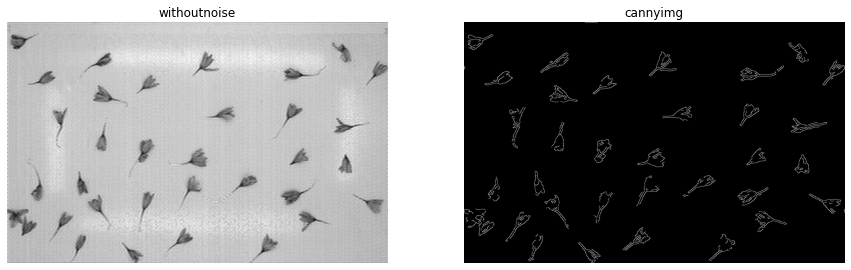

In [5]:
img = cv2.imread(r"images/withoutnoise.jpg",cv2.IMREAD_GRAYSCALE)
edge = cv2.Canny(img,60,150)
  
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("withoutnoise")
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(edge,cmap='gray')
plt.title("cannyimg")
plt.axis("off")

<h3>part c</h3>

(-0.5, 1289.5, 814.5, -0.5)

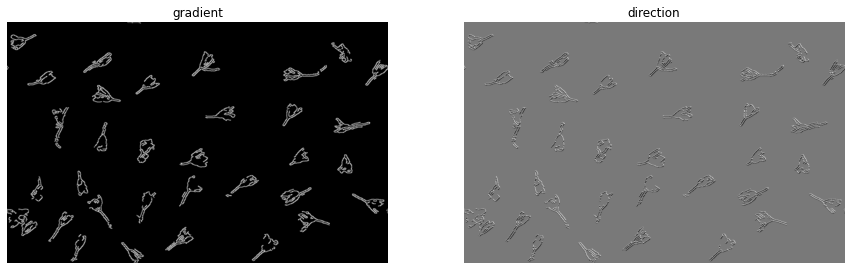

In [6]:
grad_x = cv2.Sobel(edge, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(edge, cv2.CV_64F, 0, 1, ksize=3)


# calculate the Sobel filter in both x and y directions
sobelgussixy = np.sqrt(grad_x**2 + grad_y**2)

direction = np.arctan2(grad_y, grad_x)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(sobelgussixy,cmap='gray')
plt.title("gradient")
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(direction,cmap='gray')
plt.title("direction")
plt.axis("off")

<h1>Q5</h1>

In [2]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

<h3>part a</h3>

(-0.5, 245.5, 204.5, -0.5)

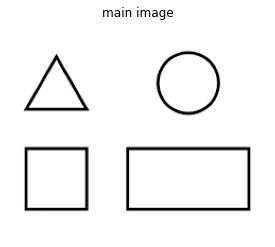

In [8]:
image = cv2.imread(r'images/Q7.png')
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

<h3>part b</h3>

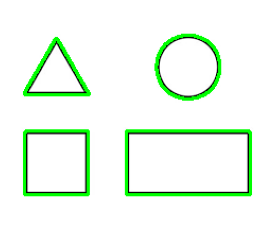

In [9]:
# Convert to grayscale
image1=image.copy()
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 110)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


# Draw contours on the original image
cv2.drawContours(image1, contours, -1, (0, 255, 0), 2)

# # Display the result
# cv2.imshow('Contours', edges)
# cv2.waitKey(0)

plt.imshow(image1)
plt.axis("off")
plt.show()

<h3>part c</h3>

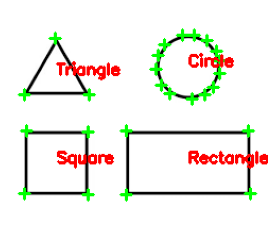

In [19]:
image2=image.copy()
# Find the shape by detecting the corners
for contour in contours:
    # Approximate the contour to a polygon
    approx = cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour, True), True)
    # Determine the shape based on the number of corners
    for point in approx:
        x, y = point[0]
        # Draw a marker at the corner point
        cv2.drawMarker(image2, (x, y), (0, 255, 0), markerType=cv2.MARKER_CROSS, markerSize=10, thickness=2)
    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) == 4:
        # Check if the shape is a square
        x,y,w,h = cv2.boundingRect(contour)
        if w-h==0:
            shape = "Square"
        else:
            shape = "Rectangle"
    elif len(approx) == 5:
        shape = "Pentagon"
    elif len(approx) == 6:
        shape = "Hexagon"
    elif len(approx)>10:
        shape = "Circle"
    
    # Draw a marker at the center of the shape
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    # cv2.drawMarker(image2, (cx, cy), (255, 0, 0), markerType=cv2.MARKER_CROSS, markerSize=2, thickness=2)
    
    # Add the shape label to the image
    cv2.putText(image2, shape, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the result
plt.imshow(image2)
plt.axis("off")
plt.show()